In [1]:
#import ROOT
#import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
from melp import HitRate
#import melp

Welcome to JupyROOT 6.24/06


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
#mu3e_detector = Detector.initFromROOT("sorted.root")
mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector geometry loaded

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
Analyzer = HitRate(mu3e_detector, "test")

In [7]:
print(mu3e_detector.TileDetector.tile[200001].hits)

[<melp.src.hit.Hit object at 0x7f44e82311f0>, None]


In [8]:
#for i in mu3e_detector.Tiles.tile:
#    print(mu3e_detector.Tiles.tile[i].pos)

In [9]:
mu3e_detector.addTileHits("sorted.root")

In [10]:
#print(mu3e_detector.Hits[0].pos)

In [11]:
num = 0
for i in mu3e_detector.TileDetector.tile:
    #print(i)
    if len(mu3e_detector.TileDetector.tile[i].hits) > 0:
        #print(mu3e_detector.Tiles.tile[i].hits[0].mc_i)
        num += 1
print(num)

4832


In [12]:
#mu3e_detector.Tiles.rateId()

In [13]:
#mu3e_detector.Tiles.tile

In [14]:
#mu3e_detector.Sensors.getPixelPos(256704512)

In [15]:
#mu3e_detector.Sensors.sensor

In [16]:
z_arr   = []
hit_arr = []

dict_rate = mu3e_detector.TileDetector.rateId()

for i in dict_rate:
    z_arr.append(mu3e_detector.TileDetector.getPos(i)[2])
    hit_arr.append(dict_rate[i])

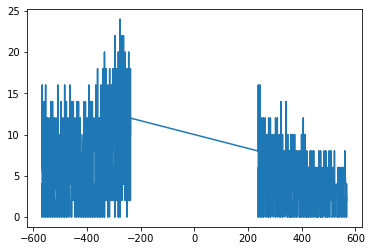

In [17]:
plt.plot(z_arr,hit_arr)
plt.show()

In [18]:
z_arr, hit_arr = mu3e_detector.TileDetector.rateZ()

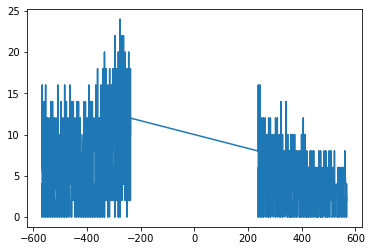

In [19]:
plt.plot(z_arr,hit_arr)
plt.show()

In [20]:
mu3e_detector.TileDetector.tile[200999].pos

[23.096768680569443, -56.094901765031594, -457.345]

In [21]:
mu3e_detector.TileDetector.calcTruthImpactVec("soted_test.root")

In [22]:
#mu3e_detector.Tiles.tile[200999].impact_vec


In [23]:
#mu3e_detector.Tiles.calcAngleTruth_byId()

In [24]:
mu3e_detector.TileDetector.calcAngleTruth_byZ()

(array([-566.915, -566.915, -566.915, ...,  566.915,  566.915,  566.915]),
 array([ 58.32588508,  49.91934744,  45.146559  , ..., 144.38651365,
        147.11290687, 115.79093279]))

In [25]:
binned, xedges, yedges = mu3e_detector.TileDetector.getBinned()

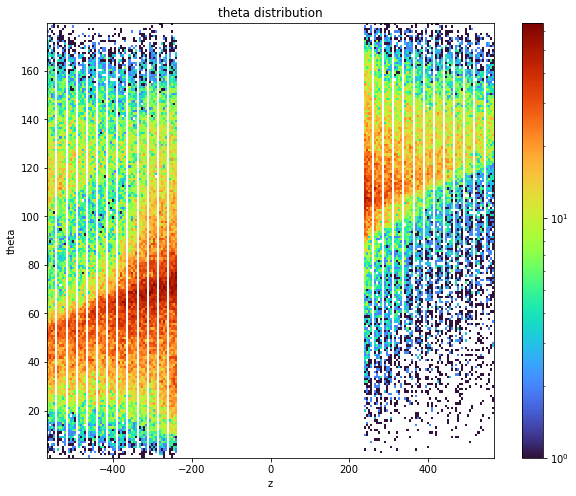

In [26]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()